Test: ch150-1, Config: {'Selection': 'Tournament', 'Crossover': 'Uniform', 'Mutation': 'SingleSwap'}, Args: {'Population': 300, 'Generations': 5000, 'MutationRate': 0.5, 'ElitismRate': 0.3}, BestDistance:10563
Survival of the fittest: 
{
  "Test": "ch150",
  "Config": {
    "SelectionAlgorithm": "tournament_selection",
    "CrossoverScheme": "uniform_crossover",
    "MutationMethod": "single_swap_mutation"
  },
  "Args": {
    "Population": 300,
    "Generations": 5000,
    "MutationRate": 0.5,
    "ElitismRate": 0.3
  },
  "Evolution": [
    {
      "Generation": "0",
      "Fitness": "2.1e-05",
      "Chromosome": "[146, 70, 29, 136, 119, 100, 143, 20, 99, 108, 104, 84, 42, 43, 71, 128, 65, 79, 76, 105, 18, 129, 92, 46, 142, 39, 64, 56, 131, 73, 82, 95, 59, 1, 15, 34, 49, 88, 89, 5, 8, 112, 54, 47, 69, 125, 86, 106, 133, 6, 81, 148, 14, 60, 97, 7, 96, 116, 2, 90, 113, 87, 149, 75, 35, 45, 102, 19, 144, 27, 98, 31, 32, 53, 126, 57, 137, 28, 109, 22, 13, 24, 11, 10, 139, 68, 123, 118, 

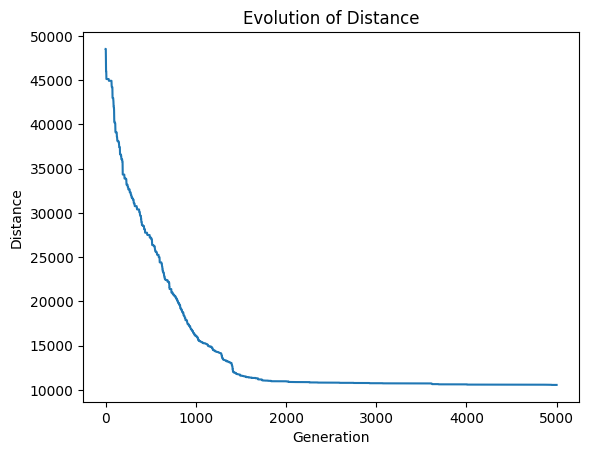

In [5]:
import matplotlib.pyplot as plt
from TspFunctions import TspFunctions
from MyGeneticAlgorithm import *
import json
import glob

results = []
####------------CONFIGURATION PARAMS --------------####
datasets = glob.glob('test_datasets/*.tsp')
mutationFunctions = [MutationMethodEnum.SINGLE_SWAP]
selectionAlgorithms = [SelectionAlgorithmEnum.TOURNAMENT]
crossoverFunctions = [CrossoverSchemeEnum.UNIFORM]

populations = [300]
generations = [5000]
mutation_rates = [0.5]
elitism_rates = [0.3]                                     #3x3x3 = 27 test
########################################################

for dataset in datasets:
    tsp = TspFunctions(dataset)
    results = []
    logs = []
    with open("results/"+tsp.get_name()+".json", 'w') as outfile:
        for selection in selectionAlgorithms:
            for crossover in crossoverFunctions:
                for mutation in mutationFunctions:
                    ga = MyGeneticAlgorithm(selection, crossover, mutation)
                    for population in populations:
                        for generation in generations:
                            for mutation_rate in mutation_rates:
                                for elitism_rate in elitism_rates:
                                        result = ga.run(tsp, population, generation, mutation_rate, elitism_rate)
                                        results.append(result)
                                        result = "Test: " +result["Test"]+"-"+str(len(results)) + ", Config: "+ str({"Selection": selection.value, "Crossover": crossover.value, "Mutation":mutation.value})+ ", Args: " + str(result["Args"])+", BestDistance:" +str(result["BestResult"]["Distance"])
                                        print(result)
                                        logs.append(result)

        best_result = max(results, key=lambda x: x["BestResult"]["Fitness"])
        print("Survival of the fittest: \n" + json.dumps(best_result, indent=2))
        json_data = {"results": logs, "SurvivalOfTheFittest": best_result}
        json.dump(json_data, outfile, indent=2)

        # Extract the distances from the results
        distances = [float(result["Distance"]) for result in best_result["Evolution"]]

        # Plot the evolution of distance
        plt.plot(distances)
        plt.xlabel("Generation")
        plt.ylabel("Distance")
        plt.title("Evolution of Distance")
        plt.show()

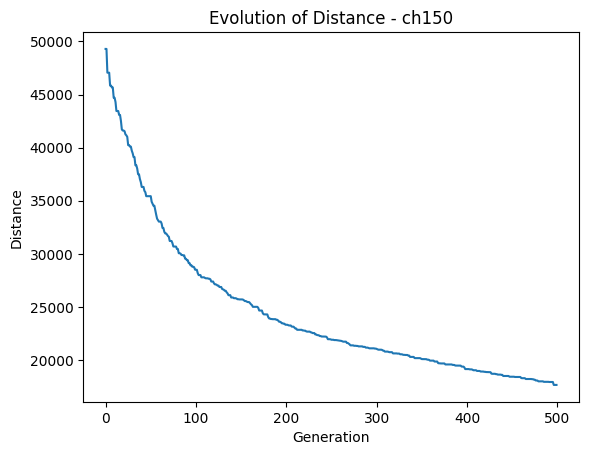

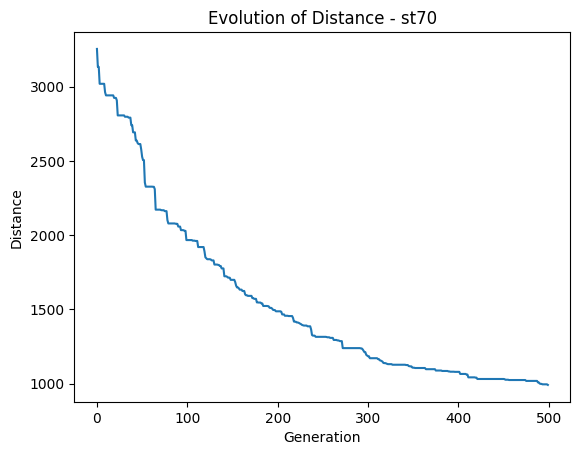

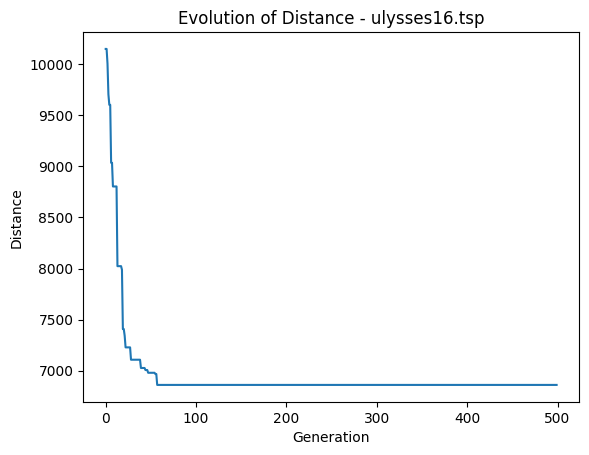

In [2]:
import matplotlib.pyplot as plt
import json
import glob

json_logs = glob.glob('results/*.json')
for log in json_logs:
    with open(log, 'r') as log_file:
        log_data = json.load(log_file)
        # Extract the distances from the results
        distances = [float(result["Distance"]) for result in log_data["SurvivalOfTheFittest"]["Evolution"]]

        # Plot the evolution of distance
        plt.plot(distances)
        plt.xlabel("Generation")
        plt.ylabel("Distance")
        plt.title("Evolution of Distance - " +log_data["SurvivalOfTheFittest"]["Test"])
        plt.show()